In [42]:
import os
import SimpleITK as sitk
import math
import glob
import pandas as pd
import random
import time
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import PIL
import pydicom

In [43]:
#开始structure的提取
def drawslince(image, msk, contor):
    # size=image.GetSize()
    ctor = []
    for point in contor:
        temppoint = image.TransformPhysicalPointToIndex(point)
        ctor.append((temppoint[0], temppoint[1]))
    ctor = np.array(ctor).reshape(-1, 1, 2)
    # slince=np.zeros((size[0],size[1]))
    msk = cv2.drawContours(msk, [ctor], -1, 1, thickness=cv2.FILLED)

    return msk, temppoint[2]

from dicompylercore import dicomparser
########################
# 从rtstruct中提取ROI，ROI名字不分大小写包含tg_ctor_name,为mask
# mask2nii(image,mskpath,tg_ctor_name,savepath)
# image : 原始图像SimpleITK.SimpleITK.Image类型文件
# mskpath: RTstruct文件目录
# tg_ctor_name: mask roi 名字
# savepath保存路径
#########################
def mask2nii(image, mskpath, tg_ctor_name, savepath):
    tg_ctor_name = tg_ctor_name.upper()
    rtss = dicomparser.DicomParser(mskpath)
    rois = rtss.GetStructures()
    roikey = [roi_id for roi_id in rois.keys() if rois[roi_id]['name'].upper() == tg_ctor_name]

    if len(roikey) == 0:
        return None
    ########read mask

    size = image.GetSize()  # x, y, z
    imagemask = np.zeros(size)
    roi = rtss.GetStructureCoordinates(roikey[0])
    for slicer_i in roi.keys():
        msk = np.zeros((size[0], size[1]))
        maskcount = len(roi[slicer_i])

        for i in range(maskcount):
            tempcontor = roi[slicer_i][i]['data']
            msk, slicenum = drawslince(image, msk, tempcontor)
        #     sigalcontor=[image.TransformPhysicalPointToIndex(point) for point in tempcontor] #x,y,z
        # imagemask=cv2.drawContours(image,sigalcontor,-1,255)
        # # if maskcount==1:
        #     plt.figure()
        #     plt.imshow(msk,cmap='gray')
        imagemask[:, :, slicenum] = msk
    imagemask = imagemask.transpose((2, 0, 1))
    mask = sitk.GetImageFromArray(imagemask)
    mask.SetOrigin(image.GetOrigin())
    mask.SetDirection(image.GetDirection())
    mask.SetSpacing(image.GetSpacing())
    # if not savepath == '':
    #mask转换成array
    # mask=sitk.ReadImage(mask)
    # mask_array=sitk.GetArrayFromImage(mask)
    # np.save(savepath,mask_array)
    sitk.WriteImage(mask, savepath)

    return mask

In [44]:
#一个病人修改好即可
pgtv='PTV2'
ptv='PTV1'
bladder='Bladder'
bowel='SmallIntestine'
lfem='FemurHead_L'
rfem='FemurHead_R'
rectum='Rectum'
number='test patient2\RT232101'

In [45]:
i=number[14:]
i

'RT232101'

In [46]:
#PGTV提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=pgtv#########################################危及器官修改处
i=number[14:]
print(i)
savepath='test input2\PGTV\{}_pgtv.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2\PGTV\{}_pgtv.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

RT232101


In [47]:
#PTV提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=ptv#########################################危及器官修改处
i=number[14:]
savepath='test input2\PTV\{}_ptv.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2\PTV\{}_ptv.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

In [48]:
#bladder提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=bladder#########################################危及器官修改处
i=number[14:]
savepath='test input2/bladder/{}_bladder.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2/bladder/{}_bladder.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

In [49]:
#bowel提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=bowel#########################################危及器官修改处
i=number[14:]
savepath='test input2/bowel/{}_bowel.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2/bowel/{}_bowel.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

In [50]:
#lfem提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=lfem#########################################危及器官修改处
i=number[14:]
savepath='test input2\lfem\{}_lfem.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2\lfem\{}_lfem.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

In [51]:
#rfem提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=rfem#########################################危及器官修改处
i=number[14:]
savepath='test input2/rfem/{}_rfem.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2/rfem/{}_rfem.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

In [52]:
#rectum提取
#开始structure的提取，是nii格式（每个单独修改）
image_path='{}\CT.nrrd'.format(number)
image=sitk.ReadImage(image_path)
RS_path='{}\RS'.format(number)
path=os.listdir(RS_path)
for n in path:
    maskpath='{}\{}'.format(RS_path,n)
tg_ctor_name=rectum#########################################危及器官修改处
i=number[14:]
savepath='test input2/rectum/{}_rectum.nii'.format(i)########危及器官名称修改
mask2nii(image, maskpath, tg_ctor_name, savepath)

#转换成数组numpy格式并保存
mask=sitk.ReadImage(savepath)
mask_array=sitk.GetArrayFromImage(mask)
array_path='test input2/rectum/{}_rectum.npy'.format(i)########危及器官名称修改
np.save(array_path,mask_array)

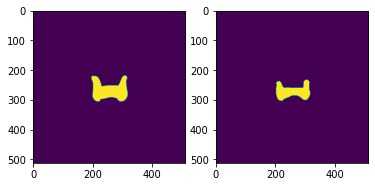

In [54]:
PTV_array=np.load('test input2\PTV\RT232101_ptv.npy')
PGTV_array=np.load('test input2/pgtv\RT232101_pgtv.npy')
PTV_pic=PTV_array[47,:,:]
PGTV_pic=PGTV_array[47,:,:]
plt.subplot(1,2,1)
plt.imshow(PTV_pic)
plt.subplot(1,2,2)
plt.imshow(PGTV_pic)